# Oblique Shock Diagram

This notebook shows how to plot the well known **Mach-$\beta$-$\theta$ relation**:

$$
\tan{\theta } = 2 \cot{ \beta } \left[ \frac{M_{1}^{2} \sin^{2}{\beta} - 1}{M_{1}^{2} \left( \gamma + \cos^{2}{ 2 \beta } \right) + 2} \right]
$$

where $\theta$ is the deflection angle and $\beta$ is the shock wave angle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from pygasflow.shockwave import (
    theta_from_mach_beta,
    beta_from_mach_max_theta,
    beta_theta_max_for_unit_mach_downstream
)

Let's specify the Mach numbers upstream of the shock wave we'd like to display, the specific heats ratio and the number of points to compute for each Mach curve:

In [2]:
# upstream mach numbers
M = [1.1, 1.5, 2, 3, 5, 10, 1e9]
# specific heats ratio
gamma = 1.4
# number of points for each Mach curve
N = 100

The last Mach number is supposed to represent infinity.

Let's initialize a few colors and labels to represent the Mach curves.

In [3]:
# colors
jet = plt.get_cmap('hsv')
cNorm  = colors.Normalize(vmin=0, vmax=len(M))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
c = [scalarMap.to_rgba(i) for i in range(len(M))]

# labels
lbls = [r"$M_{1}$ = " + str(M[i]) for  i in range(len(M))]
lbls[-1] = r"$M_1$ = $\infty$"

The plot consist of three different parts:
1. The Mach curves, which are easily computed after selecting the allowable shock wave angles for each Mach number.
2. The line corresponding to a downstream Mach number $M_{2} = 1$ (with its annotations).
3. The line passing through the point $(M, \theta_{max})$ (with its annotations).

/home/davide/Documents/Development/pygasflow/pygasflow/shockwave.py:678: RuntimeWarning: divide by zero encountered in double_scalars
  func = lambda beta: np.tan(beta) * ((M**2 * (gamma + 1)) / (2 * (M**2 * np.sin(beta)**2 - 1)) - 1)
/home/davide/Documents/Development/pygasflow/pygasflow/shockwave.py:678: RuntimeWarning: divide by zero encountered in double_scalars
  func = lambda beta: np.tan(beta) * ((M**2 * (gamma + 1)) / (2 * (M**2 * np.sin(beta)**2 - 1)) - 1)


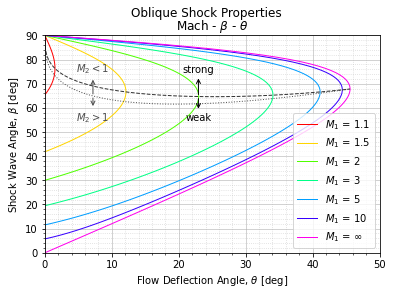

In [4]:
############################### PART 1 ###############################

# plot the Mach curves
for i, m in enumerate(M):
    beta_min = np.rad2deg(np.arcsin(1 / m))
    betas = np.linspace(beta_min, 90, N)
    thetas = theta_from_mach_beta(m, betas, gamma)
    plt.plot(thetas, betas, color=c[i], linewidth=1, label=lbls[i])

############################### PART 2 ###############################

# compute the line M2 = 1
M1 = np.logspace(0, 3, 5 * N)
beta_M2_equal_1, theta_max = beta_theta_max_for_unit_mach_downstream(M1, gamma)

plt.plot(theta_max, beta_M2_equal_1, ':', color="0.3", linewidth=1)

# select an index where to put the annotation (chosen by trial and error)
i = 20
plt.annotate("$M_{2} < 1$", 
    (theta_max[i], beta_M2_equal_1[i]),
    (theta_max[i], beta_M2_equal_1[i] + 10),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "<-", color="0.3"),
    color="0.3",
)
plt.annotate("$M_{2} > 1$", 
    (theta_max[i], beta_M2_equal_1[i]),
    (theta_max[i], beta_M2_equal_1[i] - 10),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "<-", color="0.3"),
    color="0.3",
)

############################### PART 3 ###############################

# compute the line passing through (M,theta_max)
beta = beta_from_mach_max_theta(M1, gamma)

plt.plot(theta_max, beta, '--', color="0.2", linewidth=1)

# select an index where to put the annotation (chosen by trial and error)
i = 50
plt.annotate("strong", 
    (theta_max[i], beta[i]),
    (theta_max[i], beta[i] + 10),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "<-")
)
plt.annotate("weak", 
    (theta_max[i], beta[i]),
    (theta_max[i], beta[i] - 10),
    horizontalalignment='center',
    arrowprops=dict(arrowstyle = "<-"),
)

plt.suptitle(r"Oblique Shock Properties")
plt.title(r"Mach - $\beta$ - $\theta$")
plt.xlabel(r"Flow Deflection Angle, $\theta$ [deg]")
plt.ylabel(r"Shock Wave Angle, $\beta$ [deg]")
plt.xlim((0, 50))
plt.ylim((0, 90))
plt.minorticks_on()
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend(loc="lower right")
plt.show()

A different version of the code to obtain the Mach curves can be found it the file [oblique_shock_Mach_beta_theta.py](oblique_shock_Mach_beta_theta.py).